# Rain in Australia
    
    Predict next-day rain in Australia 

# Context

    Predict next-day rain by training classification models on the target variable RainTomorrow.

# Content

    This dataset contains about 10 years of daily weather observations from many locations across Australia.

    RainTomorrow is the target variable to predict. It means -- did it rain the next day, Yes or No? This column is Yes if the rain for that day was 1mm or more.

# Source & Acknowledgements

    Observations were drawn from numerous weather stations. The daily observations are available from http://www.bom.gov.au/climate/data.
    An example of latest weather observations in Canberra: http://www.bom.gov.au/climate/dwo/IDCJDW2801.latest.shtml

    Definitions adapted from http://www.bom.gov.au/climate/dwo/IDCJDW0000.shtml
**Data source:** http://www.bom.gov.au/climate/dwo/ and http://www.bom.gov.au/climate/data.

    Copyright Commonwealth of Australia 2010, Bureau of Meteorology.



In [12]:
import random
import warnings
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report


from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB

from xgboost import XGBClassifier

pd.set_option('display.max_columns',None)
warnings.simplefilter('ignore')

In [2]:
df = pd.read_csv(r"D:\data\Aus\weatherAUS.csv")

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145460 entries, 0 to 145459
Data columns (total 23 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Date           145460 non-null  object 
 1   Location       145460 non-null  object 
 2   MinTemp        143975 non-null  float64
 3   MaxTemp        144199 non-null  float64
 4   Rainfall       142199 non-null  float64
 5   Evaporation    82670 non-null   float64
 6   Sunshine       75625 non-null   float64
 7   WindGustDir    135134 non-null  object 
 8   WindGustSpeed  135197 non-null  float64
 9   WindDir9am     134894 non-null  object 
 10  WindDir3pm     141232 non-null  object 
 11  WindSpeed9am   143693 non-null  float64
 12  WindSpeed3pm   142398 non-null  float64
 13  Humidity9am    142806 non-null  float64
 14  Humidity3pm    140953 non-null  float64
 15  Pressure9am    130395 non-null  float64
 16  Pressure3pm    130432 non-null  float64
 17  Cloud9am       89572 non-null

In [4]:
df.isnull().sum()

Date                 0
Location             0
MinTemp           1485
MaxTemp           1261
Rainfall          3261
Evaporation      62790
Sunshine         69835
WindGustDir      10326
WindGustSpeed    10263
WindDir9am       10566
WindDir3pm        4228
WindSpeed9am      1767
WindSpeed3pm      3062
Humidity9am       2654
Humidity3pm       4507
Pressure9am      15065
Pressure3pm      15028
Cloud9am         55888
Cloud3pm         59358
Temp9am           1767
Temp3pm           3609
RainToday         3261
RainTomorrow      3267
dtype: int64

In [5]:
def Fill_null_values(df,float_columns,str_columns,wind_list,rain_list,choice,Wind_dir):
    
    for float_null_value in float_columns:
        for j in range(df[float_null_value].isnull().sum()):
            value = round(random.uniform(df[float_null_value].max(),df[float_null_value].min()),1)
            df[float_null_value].fillna(value,inplace=True)
            
    for str_null_value in str_columns[2:]:
        if str_null_value in wind_list:
            for a in range(df[str_null_value].isnull().sum()):
                null = random.randint(0,len(Wind_Dir)-1)
                df[str_null_value].fillna(Wind_Dir[null],inplace= True)
        elif str_null_value in rain_list:
             for a in range(df[str_null_value].isnull().sum()):
                null = random.randint(0,len(choice)-1)
                df[str_null_value].fillna(choice[null],inplace= True)
    
    return df.isnull().sum()

In [6]:
str_columns = df.select_dtypes(include=['object']).columns
float_columns = df.select_dtypes(include=['float']).columns

choice = ['Yes',"No"]
rain_list = ['RainToday','RainTomorrow']
wind_list = ['WindGustDir','WindDir9am','WindDir3pm']
Wind_Dir = ['W', 'WNW', 'WSW', 'NE', 'NNW', 'N', 'NNE', 'SW', 'ENE','SSE', 'S','NW', 'SE', 'ESE', 'E', 'SSW']

Fill_null_values(df=df,
                 float_columns=float_columns,
                 str_columns=str_columns,
                 wind_list=wind_list,
                 rain_list=rain_list,
                 choice=choice,
                 Wind_dir=Wind_Dir)

Date             0
Location         0
MinTemp          0
MaxTemp          0
Rainfall         0
Evaporation      0
Sunshine         0
WindGustDir      0
WindGustSpeed    0
WindDir9am       0
WindDir3pm       0
WindSpeed9am     0
WindSpeed3pm     0
Humidity9am      0
Humidity3pm      0
Pressure9am      0
Pressure3pm      0
Cloud9am         0
Cloud3pm         0
Temp9am          0
Temp3pm          0
RainToday        0
RainTomorrow     0
dtype: int64

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145460 entries, 0 to 145459
Data columns (total 23 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Date           145460 non-null  object 
 1   Location       145460 non-null  object 
 2   MinTemp        145460 non-null  float64
 3   MaxTemp        145460 non-null  float64
 4   Rainfall       145460 non-null  float64
 5   Evaporation    145460 non-null  float64
 6   Sunshine       145460 non-null  float64
 7   WindGustDir    145460 non-null  object 
 8   WindGustSpeed  145460 non-null  float64
 9   WindDir9am     145460 non-null  object 
 10  WindDir3pm     145460 non-null  object 
 11  WindSpeed9am   145460 non-null  float64
 12  WindSpeed3pm   145460 non-null  float64
 13  Humidity9am    145460 non-null  float64
 14  Humidity3pm    145460 non-null  float64
 15  Pressure9am    145460 non-null  float64
 16  Pressure3pm    145460 non-null  float64
 17  Cloud9am       145460 non-nul

In [8]:
def encode(df):
    encode_columns = list(df.select_dtypes(include=['object']))
    led = LabelEncoder()
    for columns in encode_columns:
        try:
            df[columns] = led.fit_transform(df[columns])
        except:
            print('Some Columns have null values or it not a Object dtype')
    return df

In [9]:
encode(df=df)

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,396,2,13.4,22.9,0.6,45.8,5.7,13,44.0,13,14,20.0,24.0,71.0,22.0,1007.7,1007.1,8.0,2.0,16.9,21.8,0,0
1,397,2,7.4,25.1,0.0,45.8,5.7,14,44.0,6,15,4.0,22.0,44.0,25.0,1010.6,1007.8,6.8,2.0,17.2,24.3,0,0
2,398,2,12.9,25.7,0.0,45.8,5.7,15,46.0,13,15,19.0,26.0,38.0,30.0,1007.6,1008.7,6.8,2.0,21.0,23.2,0,0
3,399,2,9.2,28.0,0.0,45.8,5.7,4,24.0,9,0,11.0,9.0,45.0,16.0,1017.6,1012.8,6.8,2.0,18.1,26.5,0,0
4,400,2,17.5,32.3,1.0,45.8,5.7,13,41.0,1,7,7.0,20.0,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145455,3431,41,2.8,23.4,0.0,45.8,5.7,0,31.0,9,1,13.0,11.0,51.0,24.0,1024.6,1020.3,6.8,2.0,10.1,22.4,0,0
145456,3432,41,3.6,25.3,0.0,45.8,5.7,6,22.0,9,3,13.0,9.0,56.0,21.0,1023.5,1019.1,6.8,2.0,10.9,24.5,0,0
145457,3433,41,5.4,26.9,0.0,45.8,5.7,3,37.0,9,14,9.0,9.0,53.0,24.0,1021.0,1016.8,6.8,2.0,12.5,26.1,0,0
145458,3434,41,7.8,27.0,0.0,45.8,5.7,9,28.0,10,3,13.0,7.0,51.0,24.0,1019.4,1016.5,3.0,2.0,15.1,26.0,0,0


<AxesSubplot:>

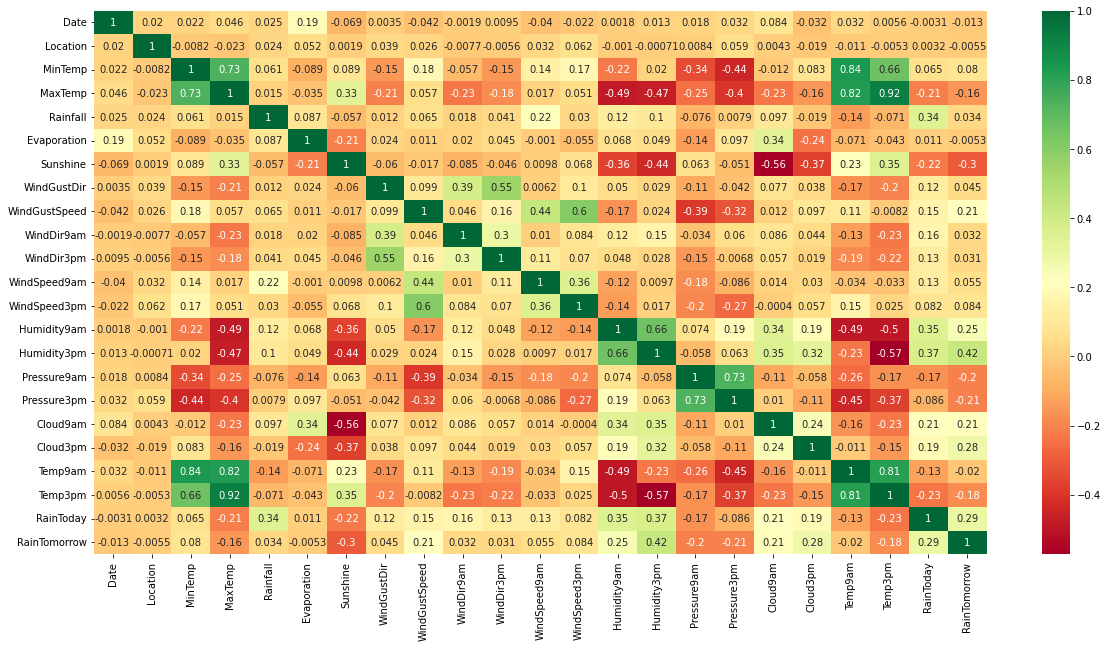

In [13]:
plt.figure(figsize=(20,10))
sns.heatmap(df.corr(),annot=True, cmap='RdYlGn')

In [14]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(df.drop(columns=['RainTomorrow']),
                                                 df.RainTomorrow,
                                                test_size=0.3,
                                                random_state=42)

In [15]:
log_model = LogisticRegression()
log_model.fit(X_train,y_train)
log_prd = log_model.predict(X_test)
print(classification_report(y_test,log_prd))

              precision    recall  f1-score   support

           0       0.85      0.94      0.90     33987
           1       0.69      0.43      0.53      9651

    accuracy                           0.83     43638
   macro avg       0.77      0.69      0.71     43638
weighted avg       0.82      0.83      0.82     43638



In [16]:
knn_model = KNeighborsClassifier()
knn_model.fit(X_train,y_train)
knn_prd = knn_model.predict(X_test)
print(classification_report(y_test,knn_prd))

              precision    recall  f1-score   support

           0       0.86      0.94      0.90     33987
           1       0.68      0.44      0.54      9651

    accuracy                           0.83     43638
   macro avg       0.77      0.69      0.72     43638
weighted avg       0.82      0.83      0.82     43638



In [17]:
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train,y_train)
rf_prd = rf_model.predict(X_test)
print(classification_report(y_test,rf_prd))

              precision    recall  f1-score   support

           0       0.87      0.96      0.91     33987
           1       0.77      0.49      0.60      9651

    accuracy                           0.86     43638
   macro avg       0.82      0.72      0.76     43638
weighted avg       0.85      0.86      0.84     43638



In [18]:
gn_model = GaussianNB()
gn_model.fit(X_train,y_train)
gn_prd = gn_model.predict(X_test)
print(classification_report(y_test,gn_prd))

              precision    recall  f1-score   support

           0       0.90      0.82      0.86     33987
           1       0.51      0.67      0.58      9651

    accuracy                           0.79     43638
   macro avg       0.71      0.75      0.72     43638
weighted avg       0.81      0.79      0.80     43638



In [19]:
xg_model = XGBClassifier()
xg_model.fit(X_train,y_train)
xg_prd = xg_model.predict(X_test)
print(classification_report(y_test,xg_prd))

[12:29:30] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
              precision    recall  f1-score   support

           0       0.88      0.95      0.91     33987
           1       0.76      0.54      0.63      9651

    accuracy                           0.86     43638
   macro avg       0.82      0.75      0.77     43638
weighted avg       0.85      0.86      0.85     43638

